In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url1 = "https://www.promiedos.com.ar/bnacional"
pagina1 = requests.get(url1)
contenido1 = BeautifulSoup(pagina1.content, "html.parser")
tabla1 = contenido1.find('table', {'id': 'posiciones'})

if tabla1:
    equipos1 = []

    for row in tabla1.find('tbody').find_all('tr'):

        columnas = row.find_all('td')
        posicion = columnas[0].text.strip()
        equipo = columnas[1].text.strip()
        puntos = columnas[2].text.strip()
        jugados = columnas[3].text.strip()
        g = columnas[4].text.strip()
        e = columnas[5].text.strip()
        p = columnas[6].text.strip()
        gf = columnas[7].text.strip()
        gc = columnas[8].text.strip()
        dg = columnas[9].text.strip()

        equipos1.append([posicion, equipo, puntos, jugados, g, e, p, gf, gc, dg])

    df1 = pd.DataFrame(equipos1, columns=['Posicion', 'Equipo', 'Puntos', 'Jugados', 'G', 'E', 'P', 'GF', 'GC', 'DG'])
    df1.to_csv('tablaBnacionalB.csv', index=False)
    print("Guardado")

df1 = pd.read_csv('tablaBnacionalB.csv')
np.random.seed(0)
df1['GF_Local'] = np.random.randint(10, 50, df1.shape[0])
df1['GF_Visitante'] = np.random.randint(5, 30, df1.shape[0])
df1['GC_Local'] = np.random.randint(5, 30, df1.shape[0])
df1['GC_Visitante'] = np.random.randint(10, 50, df1.shape[0])




Guardado


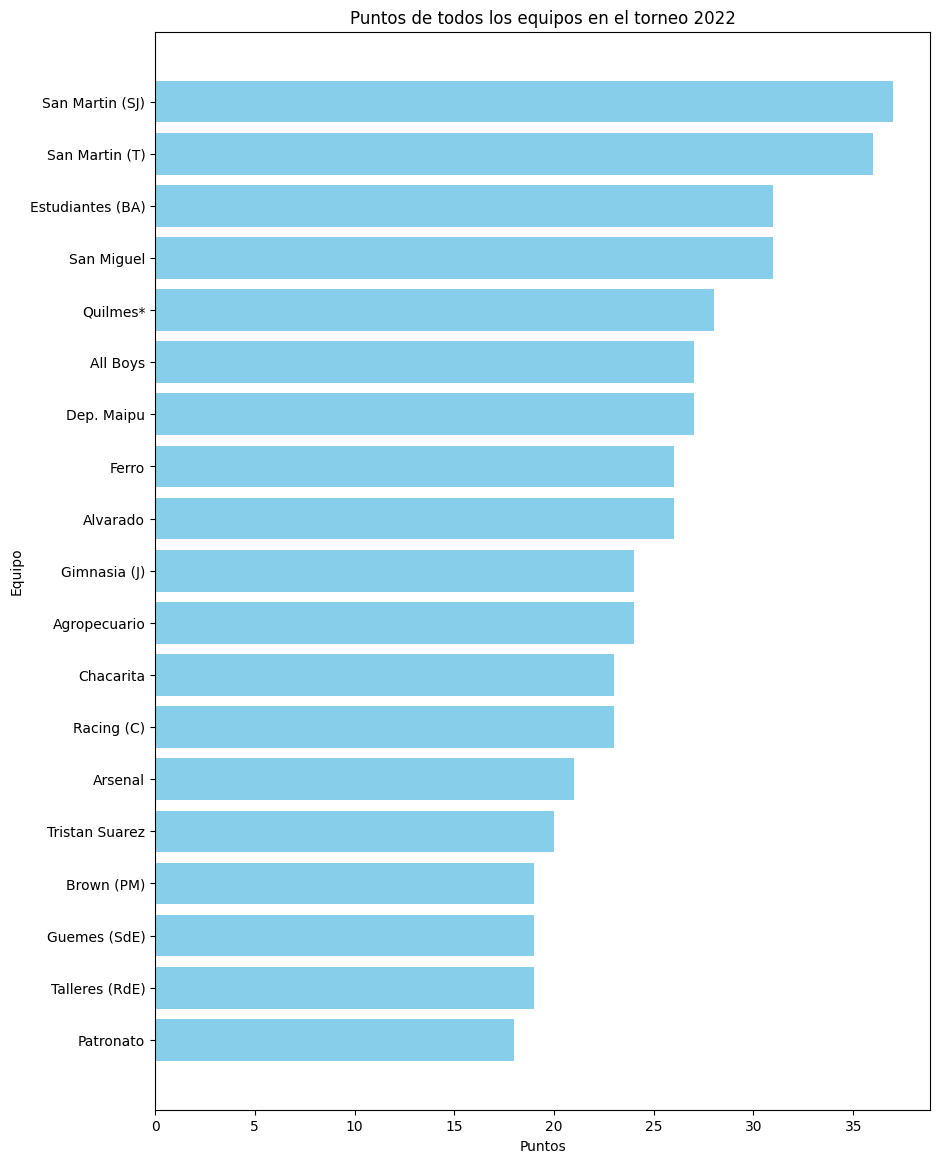

In [2]:
# equipos con más puntos (todos los equipos) - Barras Horizontales
equipos_mas_puntos = df1.sort_values(by='Puntos', ascending=False)
plt.figure(figsize=(10, 14))
plt.barh(equipos_mas_puntos['Equipo'], equipos_mas_puntos['Puntos'], color='skyblue')
plt.xlabel('Puntos')
plt.ylabel('Equipo')
plt.title('Puntos de todos los equipos en el torneo 2022')
plt.gca().invert_yaxis()

plt.show()



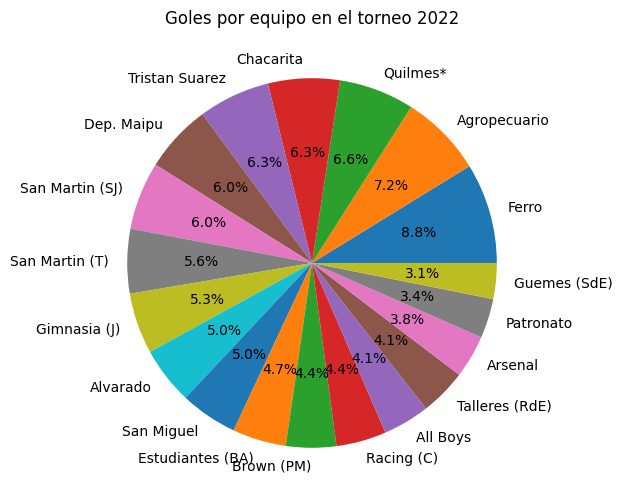

In [3]:
# goles por equipo en el torneo 2022
goles_totales = df1['GF'].sum()
goles_por_equipo = df1.groupby('Equipo')['GF'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.pie(goles_por_equipo, labels=goles_por_equipo.index, autopct="%1.1f%%")
plt.title('Goles por equipo en el torneo 2022')

plt.show()


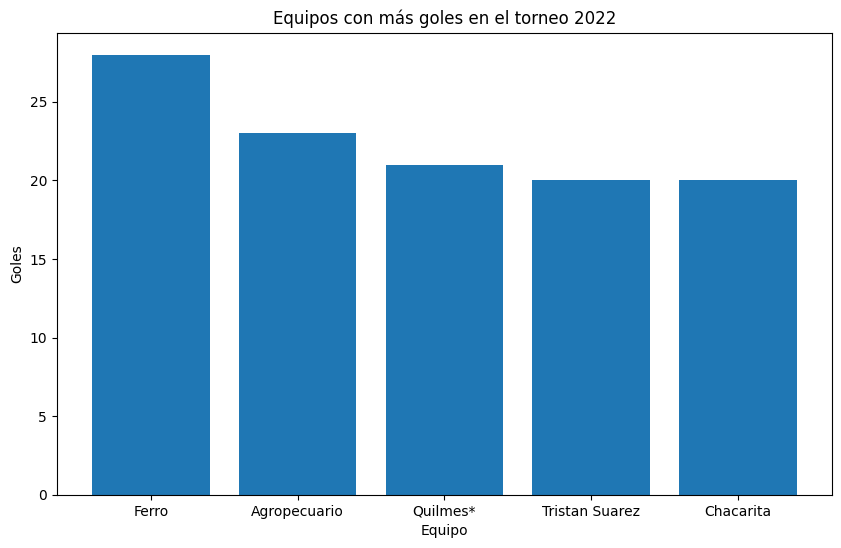

In [4]:
# equipos con más goles
equipos_mas_goles = df1.sort_values(by='GF', ascending=False).head(5)
plt.figure(figsize=(10, 6))
plt.bar(equipos_mas_goles['Equipo'], equipos_mas_goles['GF'])
plt.xlabel('Equipo')
plt.ylabel('Goles')
plt.title('Equipos con más goles en el torneo 2022')

plt.show()



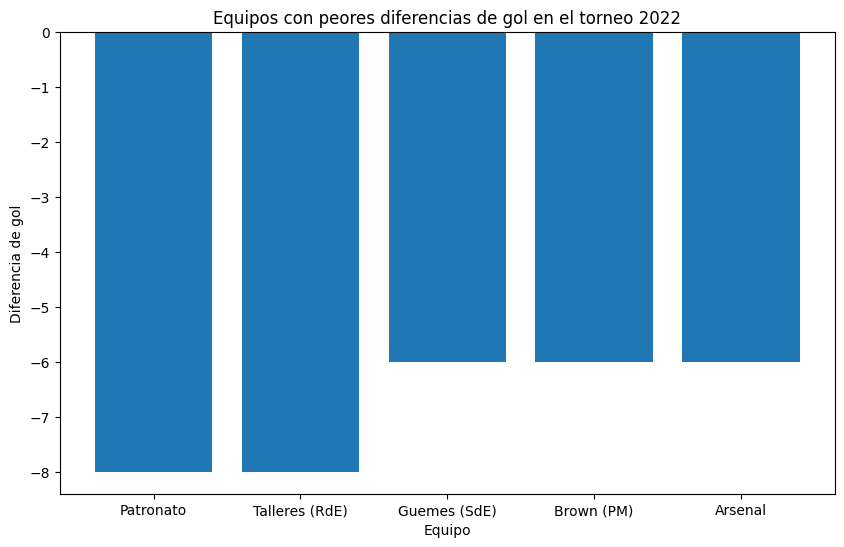

In [ ]:

# equipos con peores diferencias de gol
equipos_peores_dg = df1.sort_values(by='DG', ascending=True).head(5)
plt.figure(figsize=(10, 6))
plt.bar(equipos_peores_dg['Equipo'], equipos_peores_dg['DG'])
plt.xlabel('Equipo')
plt.ylabel('Diferencia de gol')
plt.title('Equipos con peores diferencias de gol en el torneo 2022')

plt.show()



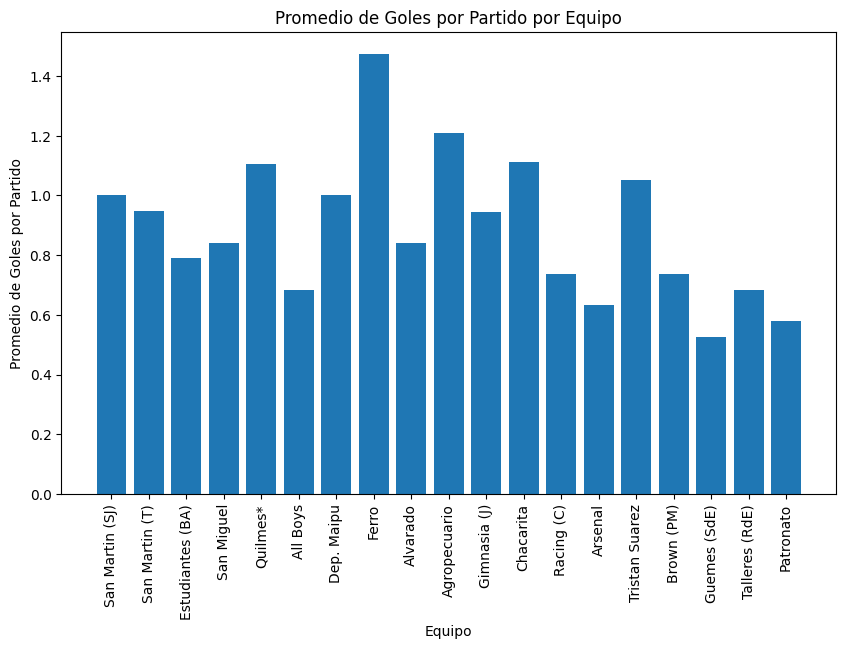

In [ ]:
# promedio de goles por partido
df1['PromedioGoles'] = df1['GF'].astype(int) / df1['Jugados'].astype(int)
plt.figure(figsize=(10, 6))
plt.bar(df1['Equipo'], df1['PromedioGoles'])
plt.xlabel('Equipo')
plt.ylabel('Promedio de Goles por Partido')
plt.title('Promedio de Goles por Partido por Equipo')

plt.xticks(rotation=90)
plt.show()

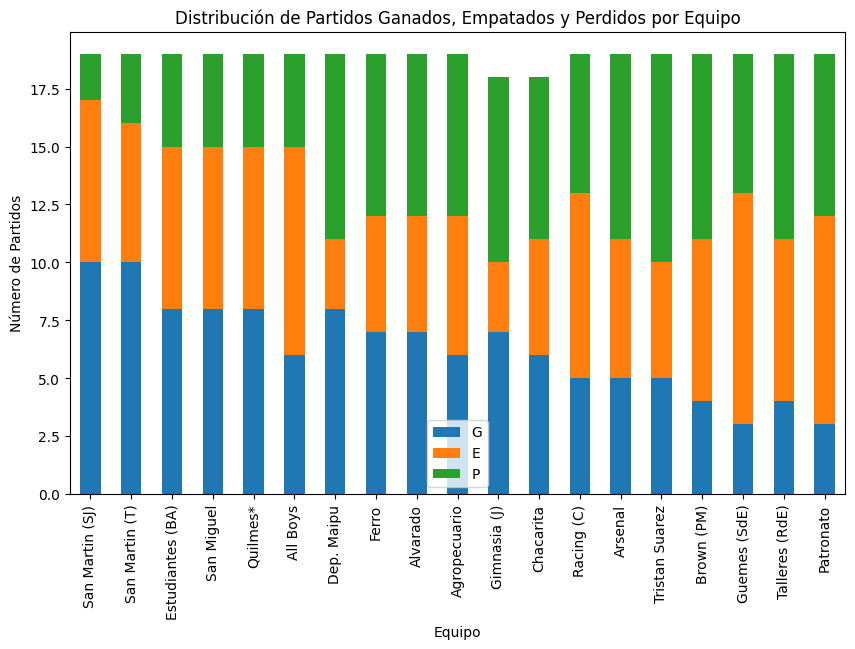

In [ ]:
# distribucion de resultados (ganados - empatados - perdidos)
df1['G'] = df1['G'].astype(int)
df1['E'] = df1['E'].astype(int)
df1['P'] = df1['P'].astype(int)

df1.set_index('Equipo')[['G', 'E', 'P']].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Equipo')
plt.ylabel('Número de Partidos')
plt.title('Distribución de Partidos Ganados, Empatados y Perdidos por Equipo')
plt.xticks(rotation=90)

plt.show()


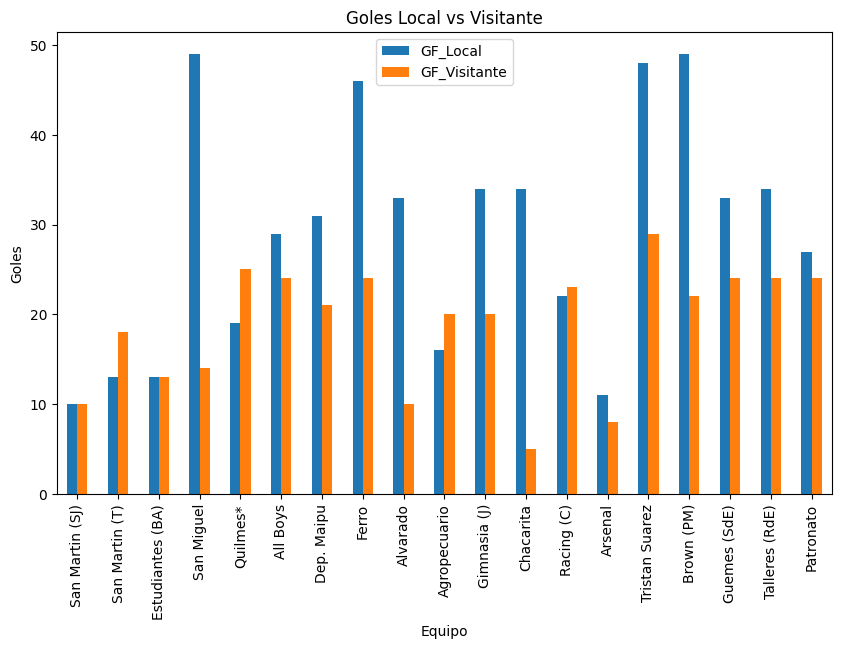

In [ ]:
# grafico de comparacion de goles local - visitante

df1 = df1.rename(columns={'GF_Casa': 'GF_Local', 'GF_Fuera': 'GF_Visitante'})
df1.set_index('Equipo')[['GF_Local', 'GF_Visitante']].plot(kind='bar', figsize=(10, 6))
plt.xlabel('Equipo')
plt.ylabel('Goles')
plt.title('Goles Local vs Visitante')

plt.xticks(rotation=90)
plt.show()

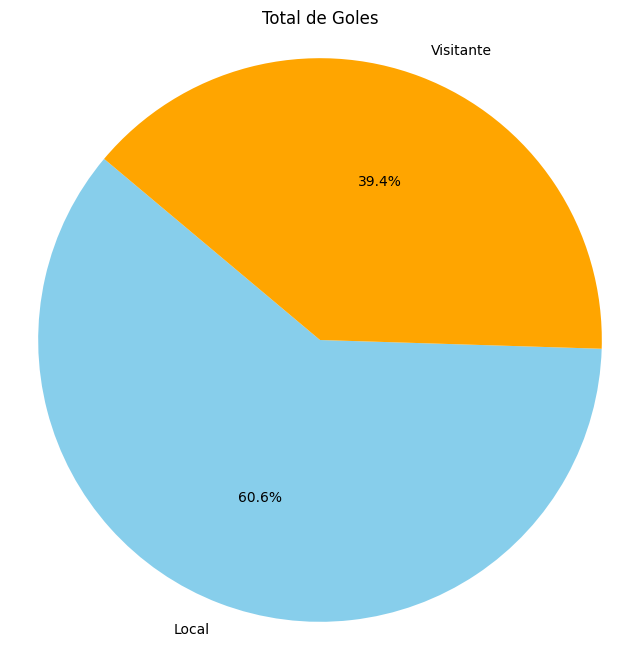

In [ ]:
df1 = df1.rename(columns={'GF_Casa': 'GF_Local', 'GF_Fuera': 'GF_Visitante'})
total_goles_local = df1['GF_Local'].sum()
total_goles_visitante = df1['GF_Visitante'].sum()
labels = ['Local', 'Visitante']
sizes = [total_goles_local, total_goles_visitante]
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Total de Goles')

plt.axis('equal')
plt.show()


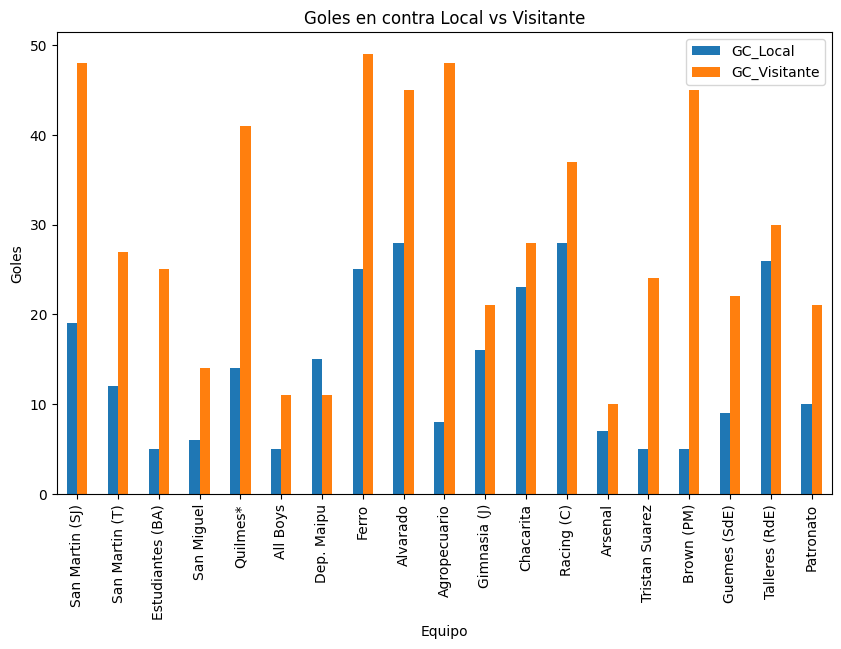

In [ ]:
# grafico de comparacion de goles local - visitante

df1 = df1.rename(columns={'GC_Casa': 'GC_Local', 'GC_Fuera': 'GC_Visitante'})
df1.set_index('Equipo')[['GC_Local', 'GC_Visitante']].plot(kind='bar', figsize=(10, 6))
plt.xlabel('Equipo')
plt.ylabel('Goles')
plt.title('Goles en contra Local vs Visitante')
plt.xticks(rotation=90)

plt.show()

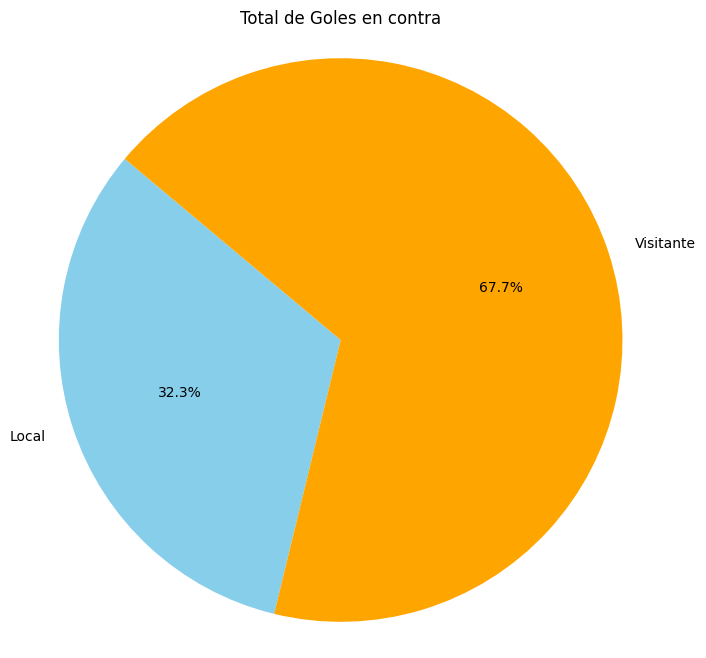

In [ ]:
df1 = df1.rename(columns={'GC_Casa': 'GC_Local', 'GC_Fuera': 'GC_Visitante'})
total_goles_local = df1['GC_Local'].sum()
total_goles_visitante = df1['GC_Visitante'].sum()
labels = ['Local', 'Visitante']
sizes = [total_goles_local, total_goles_visitante]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Total de Goles en contra')

plt.axis('equal')
plt.show()
